In [1]:
print('Hello IBM')

Hello IBM


In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

%matplotlib inline

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7ee6f81733d94c829db43ddd4f9c80a2 = 'https://s3.ap.cloud-object-storage.appdomain.cloud'
else:
    endpoint_7ee6f81733d94c829db43ddd4f9c80a2 = 'https://s3.private.ap.cloud-object-storage.appdomain.cloud'

client_7ee6f81733d94c829db43ddd4f9c80a2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wCe8oD5SeOxNMyaMNeaspuNXYfTe8zNPuFkSylRh7fCS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7ee6f81733d94c829db43ddd4f9c80a2)

body = client_7ee6f81733d94c829db43ddd4f9c80a2.get_object(Bucket='courserathebestclassifier-donotdelete-pr-0xhhwqt5sjzk67',Key='loan_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [4]:
df = df_data_5

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
...,...,...,...,...,...,...,...,...,...,...
395,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
396,396,396,COLLECTION,1000,30,9/12/2016,10/11/2016,33,High School or Below,male
397,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
398,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])

Text(0.5, 1.0, 'Percent of Loan approval states')

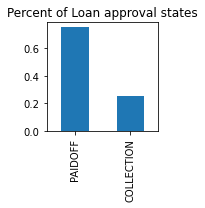

In [7]:
plt.figure(figsize=(2, 2))
fig_plt = df['loan_status'].value_counts(normalize=True).plot(kind='bar')
fig_plt.set_title('Percent of Loan approval states')

In [8]:
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [9]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
...,...,...,...,...,...,...,...,...,...,...
395,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
396,396,396,COLLECTION,1000,30,2016-09-12,2016-10-11,33,High School or Below,male
397,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
398,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      400 non-null    int64         
 1   Unnamed: 0.1    400 non-null    int64         
 2   loan_status     400 non-null    object        
 3   Principal       400 non-null    int64         
 4   terms           400 non-null    int64         
 5   effective_date  400 non-null    datetime64[ns]
 6   due_date        400 non-null    datetime64[ns]
 7   age             400 non-null    int64         
 8   education       400 non-null    object        
 9   Gender          400 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 31.4+ KB


In [11]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
5,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
6,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
7,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
8,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
9,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male


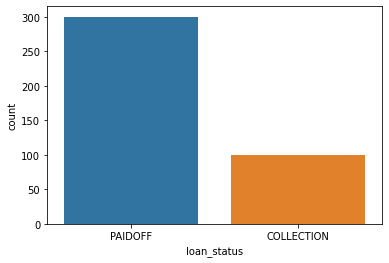

In [12]:
sns.countplot(x='loan_status', data=df)

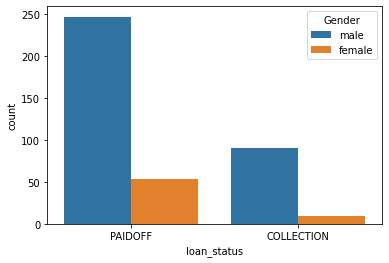

In [13]:
sns.countplot(x='loan_status', hue='Gender', data=df)

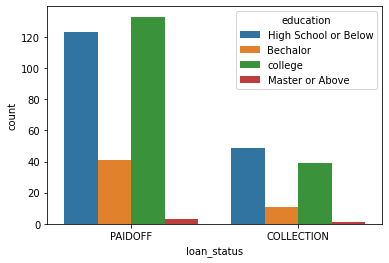

In [14]:
sns.countplot(x='loan_status', hue='education', data=df)

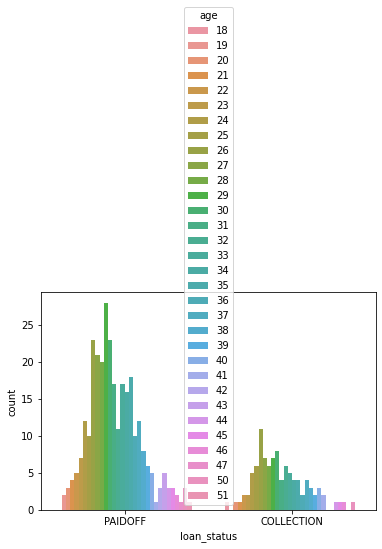

In [15]:
sns.countplot(x='loan_status', hue='age', data=df)

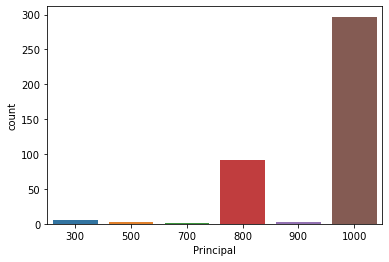

In [16]:
sns.countplot(x='Principal', data=df)

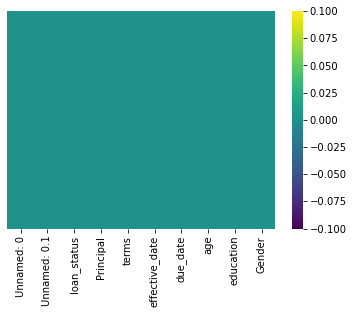

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [18]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [19]:
pd.get_dummies(df['Gender'])

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
395,0,1
396,0,1
397,0,1
398,0,1


In [20]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
...,...,...,...,...,...,...,...,...,...,...
395,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
396,396,396,COLLECTION,1000,30,2016-09-12,2016-10-11,33,High School or Below,male
397,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
398,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [21]:
df_gender = pd.get_dummies(df['Gender'], drop_first=True)

In [22]:
df_education = pd.get_dummies(df['education'], drop_first=True)

In [23]:
df_status = pd.get_dummies(df['loan_status'], drop_first=True)

In [24]:
df = pd.concat([df,df_status,df_education,df_gender],axis=1)

In [25]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,PAIDOFF,High School or Below,Master or Above,college,male
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,1,1,0,0,1
1,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,1,0,0,0,0
2,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,1,0,0,0,0
3,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,1,0,0,1,1
4,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,0,1,0,0,1
396,396,396,COLLECTION,1000,30,2016-09-12,2016-10-11,33,High School or Below,male,0,1,0,0,1
397,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0,0,1,1
398,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0,0,1,1


In [26]:
df.drop(['education','Gender','loan_status','effective_date','due_date'],axis=1,inplace=True)

In [27]:
df

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,PAIDOFF,High School or Below,Master or Above,college,male
0,0,0,1000,30,45,1,1,0,0,1
1,1,1,1000,30,50,1,0,0,0,0
2,2,2,1000,30,33,1,0,0,0,0
3,3,3,1000,15,27,1,0,0,1,1
4,4,4,1000,30,28,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,395,395,1000,30,25,0,1,0,0,1
396,396,396,1000,30,33,0,1,0,0,1
397,397,397,800,15,39,0,0,0,1,1
398,398,398,1000,30,28,0,0,0,1,1


In [28]:
df_data_5

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
...,...,...,...,...,...,...,...,...,...,...
395,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
396,396,396,COLLECTION,1000,30,2016-09-12,2016-10-11,33,High School or Below,male
397,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
398,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [29]:
df_data_5['effective_date'] = pd.to_datetime(df_data_5['effective_date'])

In [30]:
df_data_5['due_date'] = pd.to_datetime(df_data_5['due_date'])

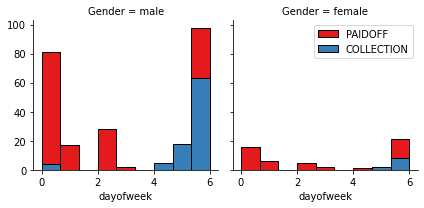

In [31]:
df_data_5['dayofweek'] = df_data_5['effective_date'].dt.dayofweek
bins = np.linspace(df_data_5.dayofweek.min(), df_data_5.dayofweek.max(), 10)
g = sns.FacetGrid(df_data_5, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [32]:
df_data_5['weekend'] = df_data_5['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [33]:
df_data_f = df_data_5['weekend']

In [34]:
df = pd.concat([df,df_data_f],axis=1)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df[2:5]

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,PAIDOFF,High School or Below,Master or Above,college,male,weekend
2,2,2,1000,30,33,1,0,0,0,0,0
3,3,3,1000,15,27,1,0,0,1,1,0
4,4,4,1000,30,28,1,0,0,1,0,1


In [37]:
df_f = df
df_f.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [38]:
df_f

,Principal,terms,age,PAIDOFF,High School or Below,Master or Above,college,male,weekend
0,1000,30,45,1,1,0,0,1,0
1,1000,30,50,1,0,0,0,0,0
2,1000,30,33,1,0,0,0,0,0
3,1000,15,27,1,0,0,1,1,0
4,1000,30,28,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
395,1000,30,25,0,1,0,0,1,1
396,1000,30,33,0,1,0,0,1,0
397,800,15,39,0,0,0,1,1,0
398,1000,30,28,0,0,0,1,1,0


In [39]:
# train data
X = df_f.drop('PAIDOFF',axis=1)
y = df_f['PAIDOFF']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
X_train= StandardScaler().fit(X_train).transform(X_train)

In [43]:
X_train

array([[ 0.47690337,  0.90390729, -1.67059429, ..., -0.85346064,
         0.4662524 ,  0.81649658],
       [-1.11277453,  0.90390729, -0.48380023, ...,  1.1717002 ,
         0.4662524 , -1.22474487],
       [ 0.47690337,  0.90390729, -0.82288425, ..., -0.85346064,
         0.4662524 ,  0.81649658],
       ...,
       [ 0.47690337,  0.90390729,  0.36390981, ..., -0.85346064,
         0.4662524 , -1.22474487],
       [ 0.47690337,  0.90390729, -0.14471621, ..., -0.85346064,
         0.4662524 , -1.22474487],
       [-1.90761347, -0.95071441,  0.36390981, ..., -0.85346064,
         0.4662524 ,  0.81649658]])

In [44]:
# K Nearest Neighbor

In [45]:
Ks = 10
mean_n = np.zeros((Ks-1))
std_n = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    knclassifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict = knclassifier.predict(X_test)
    mean_n[n-1] = metrics.accuracy_score(y_test, y_predict)
    std_n[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])
mean_n

array([0.725     , 0.55833333, 0.725     , 0.73333333, 0.725     ,
       0.725     , 0.725     , 0.725     , 0.725     ])

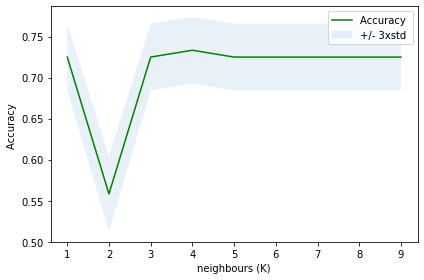

The best accuracy  0.7333333333333333 with k= 4


In [46]:
plt.plot(range(1,Ks),mean_n,'g')
plt.fill_between(range(1,Ks),mean_n - 1 * std_n,mean_n + 1 * std_n, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy ", mean_n.max(), "with k=", mean_n.argmax()+1)
knClassifier = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
knClassifier_predict = knClassifier.predict(X_test)

In [47]:
# Decision Tree

In [48]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree # it shows the default parameters
decTree.fit(X_train,y_train)
decTree = decTree.predict(X_test)

In [49]:
metrics.accuracy_score(y_test, decTree)

0.725

In [50]:
accuracy = metrics.accuracy_score(y_test, decTree)

In [51]:
print( "The best accuracy with decision tree is:", accuracy)

The best accuracy with decision tree is: 0.725


In [52]:
# Support Vector Machine

In [53]:
svm_n = svm.SVC(kernel='rbf')
svm_n.fit(X_train, y_train)
y_pred_svm = svm_n.predict(X_test)

In [54]:
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [55]:
accuracy = metrics.accuracy_score(y_test, y_pred_svm)

In [56]:
accuracy

0.725

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      1.00      0.84        87

    accuracy                           0.73       120
   macro avg       0.36      0.50      0.42       120
weighted avg       0.53      0.72      0.61       120

Confusion matrix, without normalization
[[ 0 33]
 [ 0 87]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


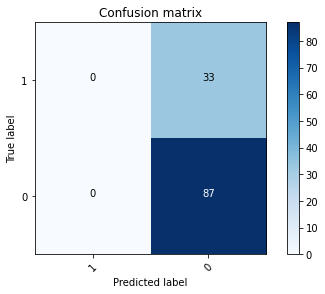

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=df["PAIDOFF"].unique().tolist(),normalize= False,  title='Confusion matrix')

In [58]:
# Logistic Regression


In [59]:
log_reg = LogisticRegression(random_state=0)


In [60]:
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [61]:
X_train[:1]

array([[ 0.48,  0.9 , -1.67, -0.85, -0.08, -0.85,  0.47,  0.82]])

In [62]:
y_train[:1]

39    1
Name: PAIDOFF, dtype: uint8

In [63]:
y_pred_log = log_reg.predict(X_test)

In [64]:
accuracy = metrics.accuracy_score(y_test, y_pred_log)

In [65]:
accuracy

0.275

In [66]:
print( "The best accuracy with log reg is:", accuracy)

The best accuracy with log reg is: 0.275


In [67]:
# overall result

In [68]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [69]:
# test for KNN 

In [70]:
f1_score_KNN = f1_score(y_test, knClassifier_predict, average='weighted') 
print('KNN F1 score: ',f1_score_KNN)
jaccard_score_KNN = jaccard_score(y_test, knClassifier_predict)
print('KNN Jaccard index: ',jaccard_score_KNN)

KNN F1 score:  0.6285551113649342
KNN Jaccard index:  0.7310924369747899


In [71]:
# test for Decision tree 

In [72]:
f1_score_DT = f1_score(y_test,decTree,average='weighted')
print("DTREE F1 score :",f1_score_DT)
jaccard_score_DT = jaccard_score(y_test, decTree)
print("DTREE Jaccard index:",jaccard_score_DT)

DTREE F1 score : 0.6094202898550724
DTREE Jaccard index: 0.725


In [73]:
# test for SVM

In [74]:
f1_score_SVM = f1_score(y_test,y_pred_svm,average='weighted')
print("SVM F1 score :",f1_score_SVM)
jaccard_score_SVM = jaccard_score(y_test, y_pred_svm)
print("SVM Jaccard index:",jaccard_score_SVM)

SVM F1 score : 0.6094202898550724
SVM Jaccard index: 0.725


In [75]:
# test for Logistic Regression

In [76]:
f1_score_LR = f1_score(y_test,y_pred_log,average='weighted')
print("LR F1 score :",f1_score_LR)
jaccard_score_LR = jaccard_score(y_test, y_pred_log)
print("LR Jaccard index :",jaccard_score_LR)

LR F1 score : 0.11862745098039218
LR Jaccard index : 0.0


In [81]:
f1Score = [f1_score_KNN, f1_score_DT, f1_score_SVM, f1_score_LR]
jaccardScore = [jaccard_score_KNN, jaccard_score_DT, jaccard_score_SVM, jaccard_score_LR]
logLoss = [None, None, None, log_loss(y_test, y_pred_log)]
df= {'Algorithm Type': ['KNN', 'Decistion Tree', 'SVM', 'Logistic Regression'], 'F1 score': f1Score, 'Jaccard Score': jaccardScore, 'Log Loss': logLoss}                           
finalReport = pd.DataFrame(data=df, columns=['Algorithm Type', 'F1 score', 'Jaccard Score', 'Log Loss'], index=None)
print(finalReport)

        Algorithm Type  F1 score  Jaccard Score   Log Loss
0                  KNN  0.628555       0.731092        NaN
1       Decistion Tree  0.609420       0.725000        NaN
2                  SVM  0.609420       0.725000        NaN
3  Logistic Regression  0.118627       0.000000  25.040613
